In [2]:
import os
import decord
from torchvision.datasets.folder import make_dataset
from decord import VideoReader
from decord import cpu
import numpy as np
import matplotlib.pyplot as plt

decord.bridge.set_bridge('torch')

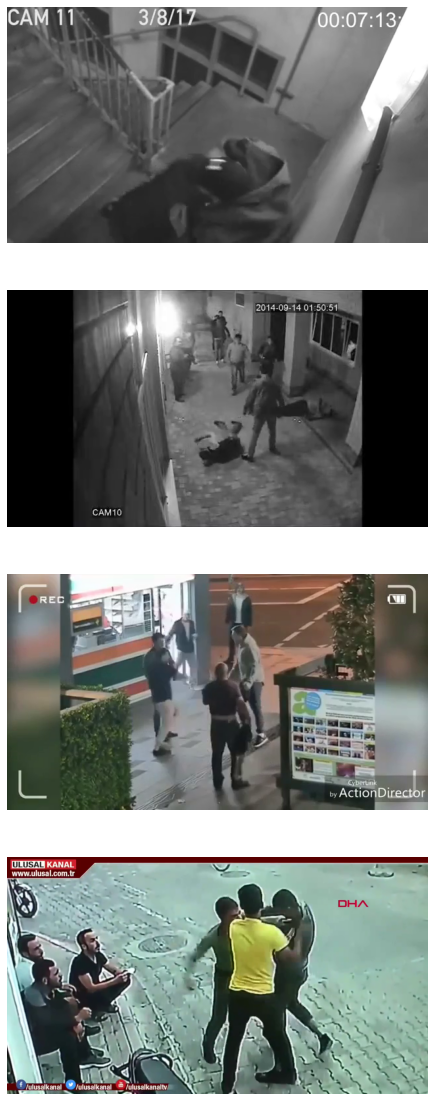

In [24]:
root = '/mnt/d/serao/fight_detection'
classes = [d.name for d in os.scandir(root) if d.is_dir()]
classes.sort()
class_to_index = {cls_name: i for i, cls_name in enumerate(classes)}
videos_index = make_dataset(root, class_to_index, ('.avi', '.mp4'), is_valid_file=None)

violence = []
non_violence = []
for video, label in videos_index:
    if label == 0:
        non_violence.append(video)
    else:
        violence.append(video)

fig = plt.figure(figsize=(20, 20))
indexes = np.multiply(list(range(4)), (len(violence) // 4)) + np.random.randint((len(violence) // 4), size=4)
indexes = indexes.tolist()
 
frames = []

for index in indexes:
    path = violence[index]
 
    reader = VideoReader(path, ctx=cpu(0))
    offset = np.random.randint(len(reader), size=1)
    frames.append(reader.get_batch(offset))


columns = 1
rows = 4
for i in range(0, columns*rows):
    img = frames[i].squeeze()
    fig.add_subplot(rows, columns, i+1)
    plt.axis('off')  
    plt.imshow(img)  
plt.show()